In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, SpectralClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, estimate_bandwidth, OPTICS
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [2]:
#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
data_url = r'E:\Journal Papers\Comparative Analysis of Advanced Clustering Algorithms for Market Segmentation\A Case Study on Online Retail\Online_Retail.csv'
data = pd.read_csv(data_url, encoding='latin1')

In [4]:
# Preprocess the data
# Remove rows with missing CustomerID
data = data.dropna(subset=['CustomerID'])

In [5]:
# Calculate TotalPrice
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

In [6]:
# Calculate Recency, Frequency, and Monetary values for each customer
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [7]:
# Filter out customers with negative or zero Monetary values
rfm = rfm[rfm['Monetary'] > 0]

In [8]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(rfm)

In [9]:
# Define clustering algorithms
clustering_algorithms = {
    "K-Means": lambda X: (KMeans(n_clusters=3, random_state=42).fit_predict(X), None),
    "Hierarchical": lambda X: (AgglomerativeClustering(n_clusters=3).fit_predict(X), None),
    "DBSCAN": lambda X: (DBSCAN(eps=0.5, min_samples=5).fit_predict(X), None),
    "GMM": lambda X: (GaussianMixture(n_components=3, random_state=42).fit_predict(X), None),
    "Mean Shift": lambda X: (MeanShift(bandwidth=estimate_bandwidth(X, quantile=0.2)).fit_predict(X), None),
    "Agglomerative": lambda X: (AgglomerativeClustering(n_clusters=3).fit_predict(X), None),
    "BIRCH": lambda X: (Birch(n_clusters=3).fit_predict(X), None),
    "Spectral": lambda X: (SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42).fit_predict(X), None),
    "OPTICS": lambda X: (OPTICS(min_samples=5).fit_predict(X), None),
    "Affinity Propagation": lambda X: (AffinityPropagation(random_state=42).fit_predict(X), None)
}

In [10]:
# Function to evaluate clustering
def evaluate_clustering(X, labels, method_name):
    if len(np.unique(labels)) > 1:
        silhouette = silhouette_score(X, labels)
        davies_bouldin = davies_bouldin_score(X, labels)
        calinski_harabasz = calinski_harabasz_score(X, labels)
        return silhouette, davies_bouldin, calinski_harabasz
    else:
        print(f"Warning: {method_name} produced {len(np.unique(labels))} labels. Skipping evaluation.")
        return np.nan, np.nan, np.nan

In [11]:
# Apply clustering algorithms and evaluate performance
results = {}
silhouette_scores = {}
davies_bouldin_scores = {}
calinski_harabasz_scores = {}

for method_name, method_func in clustering_algorithms.items():
    print(f"Applying {method_name}...")
    labels, _ = method_func(X_scaled)
    results[method_name] = labels
    silhouette_scores[method_name], davies_bouldin_scores[method_name], calinski_harabasz_scores[method_name] = evaluate_clustering(X_scaled, labels, method_name)


Applying K-Means...
Applying Hierarchical...
Applying DBSCAN...
Applying GMM...
Applying Mean Shift...
Applying Agglomerative...
Applying BIRCH...
Applying Spectral...
Applying OPTICS...
Applying Affinity Propagation...


In [12]:
# Display the results
for method_name in clustering_algorithms.keys():
    print(f"Silhouette Score ({method_name}): {silhouette_scores[method_name]}")
    print(f"Davies-Bouldin Score ({method_name}): {davies_bouldin_scores[method_name]}")
    print(f"Calinski-Harabasz Score ({method_name}): {calinski_harabasz_scores[method_name]}\n")

Silhouette Score (K-Means): 0.601436975351285
Davies-Bouldin Score (K-Means): 0.7292909132276967
Calinski-Harabasz Score (K-Means): 3074.4465290809026

Silhouette Score (Hierarchical): 0.5522327457437501
Davies-Bouldin Score (Hierarchical): 0.7106306731994613
Calinski-Harabasz Score (Hierarchical): 2631.877006420373

Silhouette Score (DBSCAN): 0.6602863788925403
Davies-Bouldin Score (DBSCAN): 1.389143452795217
Calinski-Harabasz Score (DBSCAN): 433.9035310903998

Silhouette Score (GMM): 0.1213084784359971
Davies-Bouldin Score (GMM): 1.4208703675515206
Calinski-Harabasz Score (GMM): 655.5954828499232

Silhouette Score (Mean Shift): 0.4093127124968266
Davies-Bouldin Score (Mean Shift): 0.37145211626838326
Calinski-Harabasz Score (Mean Shift): 433.8647958601185

Silhouette Score (Agglomerative): 0.5522327457437501
Davies-Bouldin Score (Agglomerative): 0.7106306731994613
Calinski-Harabasz Score (Agglomerative): 2631.877006420373

Silhouette Score (BIRCH): 0.9465554299764359
Davies-Bouldin S

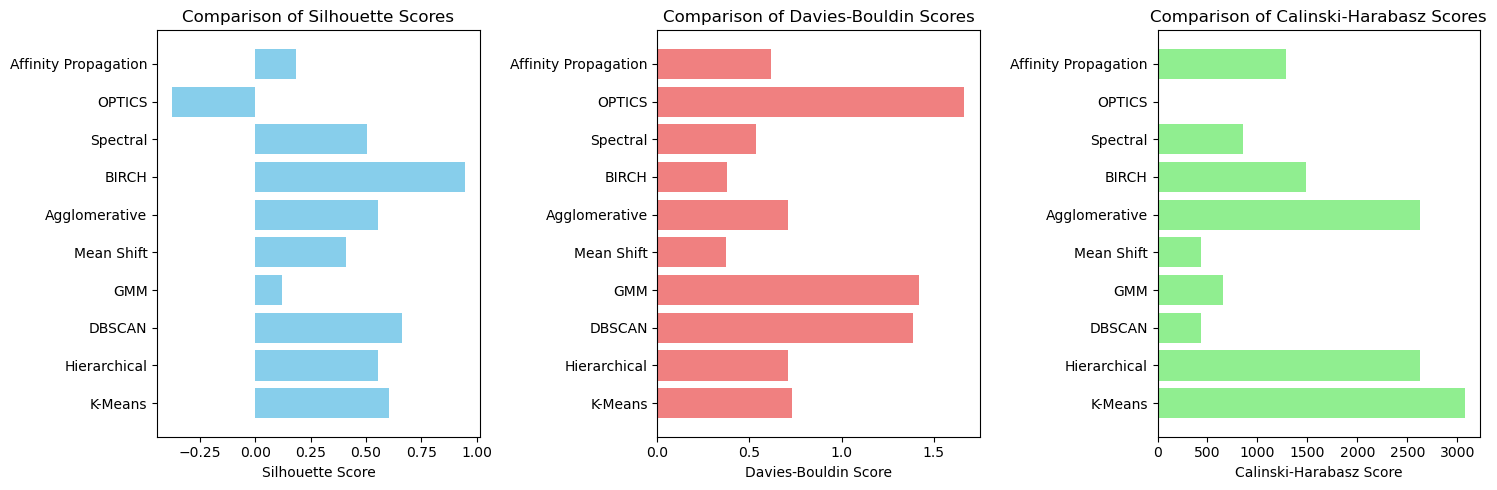

In [13]:
# Plot comparative graphs
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(list(silhouette_scores.keys()), list(silhouette_scores.values()), color='skyblue')
plt.xlabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')

plt.subplot(1, 3, 2)
plt.barh(list(davies_bouldin_scores.keys()), list(davies_bouldin_scores.values()), color='lightcoral')
plt.xlabel('Davies-Bouldin Score')
plt.title('Comparison of Davies-Bouldin Scores')

plt.subplot(1, 3, 3)
plt.barh(list(calinski_harabasz_scores.keys()), list(calinski_harabasz_scores.values()), color='lightgreen')
plt.xlabel('Calinski-Harabasz Score')
plt.title('Comparison of Calinski-Harabasz Scores')

plt.tight_layout()
plt.show()